In [1]:
# necessary imports for the notebook
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
# do all our graphics inline
%matplotlib inline
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

# Obtaining historical stock and index data

## Fetching stock data from Yahoo! 

In [2]:
# request the previous three years of data for MSFT
# 2012 through 2014
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)

# get data for MSFT
msft = pd.io.data.DataReader('MSFT', "yahoo", start, end)
msft[:5]

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77  64731500      24.42
2012-01-04  26.82  27.47  26.78  27.40  80516100      25.00
2012-01-05  27.38  27.73  27.29  27.68  56081400      25.25
2012-01-06  27.53  28.19  27.53  28.11  99455500      25.64
2012-01-09  28.05  28.10  27.72  27.74  59706800      25.31

In [3]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [4]:
# get data for the following stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     Open    High     Low   Close    Volume  Adj Close
Ticker Date                                                           
AAPL   2012-01-03  409.40  412.50  409.00  411.23  75555200      55.41
       2012-01-04  410.00  414.68  409.28  413.44  65005500      55.71
       2012-01-05  414.95  418.55  412.67  418.03  67817400      56.33
       2012-01-06  419.77  422.75  419.22  422.40  79573200      56.92
       2012-01-09  425.50  427.75  421.35  421.73  98506100      56.83

## Fetching Index data from Yahoo!

In [5]:
# get daily S&P500 info
sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5]

               Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2012-01-03  1258.86  1284.62  1258.86  1277.06  3943710000    1277.06
2012-01-04  1277.03  1278.73  1268.10  1277.30  3592580000    1277.30
2012-01-05  1277.30  1283.05  1265.26  1281.06  4315950000    1281.06
2012-01-06  1280.93  1281.84  1273.34  1277.81  3656830000    1277.81
2012-01-09  1277.83  1281.99  1274.55  1280.70  3371600000    1280.70

# Visualizing financial time series data

## Plotting closing prices

In [6]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

  Ticker       Date  Adj Close
0   AAPL 2012-01-03      55.41
1   AAPL 2012-01-04      55.71
2   AAPL 2012-01-05      56.33
3   AAPL 2012-01-06      56.92
4   AAPL 2012-01-09      56.83

In [7]:
# now pivot Date to the index, Ticker values to columns
daily_close_px = just_closing_prices.pivot('Date', 
                                           'Ticker', 
                                           'Adj Close')
daily_close_px[:5]

Ticker        AA   AAPL   DAL  ...     MSFT    PEP    UAL
Date                           ...                       
2012-01-03  8.89  55.41  7.92  ...    24.42  60.44  18.90
2012-01-04  9.10  55.71  7.89  ...    25.00  60.75  18.52
2012-01-05  9.02  56.33  8.20  ...    25.25  60.28  18.39
2012-01-06  8.83  56.92  8.19  ...    25.64  59.52  18.21
2012-01-09  9.09  56.83  8.15  ...    25.31  59.83  17.93

[5 rows x 9 columns]

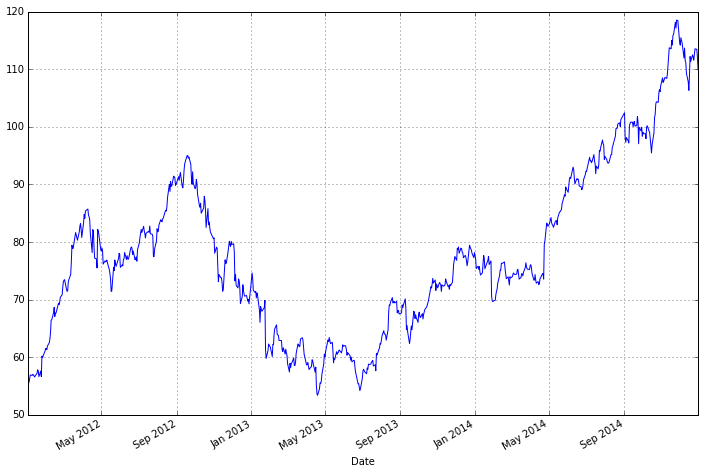

In [8]:
# plot AAPL
_ = daily_close_px['AAPL'].plot(figsize=(12,8));
plt.savefig('5104OS_05_01.png', bbox_inches='tight', dpi=300)

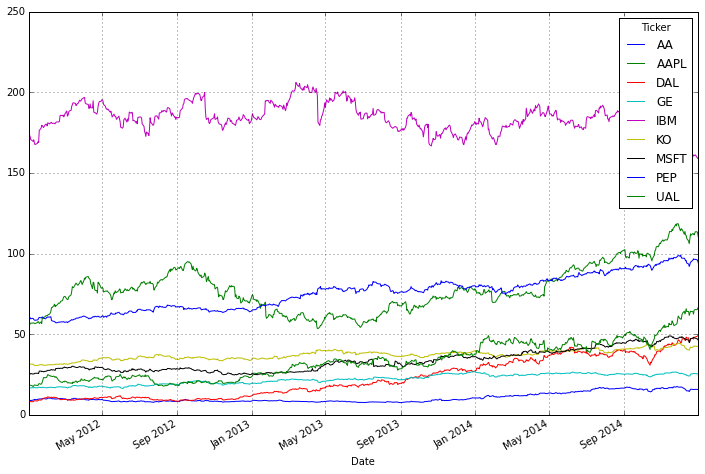

In [9]:
# plot all the stock closing prices against each other
_ = daily_close_px.plot(figsize=(12,8));
plt.savefig('5104OS_05_02.png', bbox_inches='tight', dpi=300)

## Plotting volumes series data

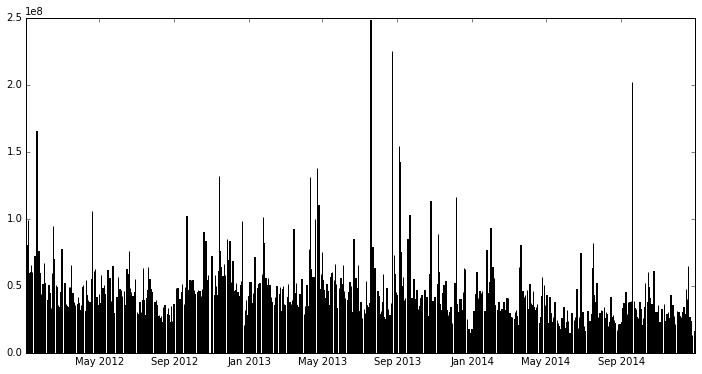

In [10]:
# get the daily volumes for MSFT
msftV = all_data.Volume.loc['MSFT']
# plot it
plt.bar(msftV.index, msftV)
# and set the plot size
plt.gcf().set_size_inches(12,6)
plt.savefig('5104OS_05_03.png', bbox_inches='tight', dpi=300)

## Combined Price and Volumes

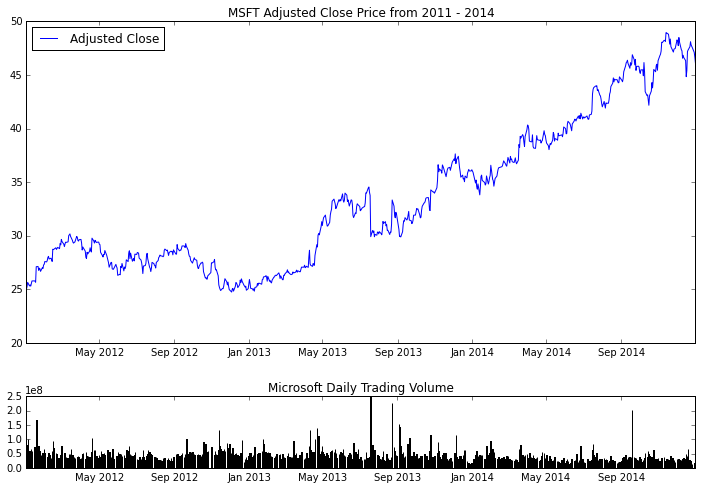

In [11]:
# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

## Plotting candlesticks

In [12]:
# subset to MSFT in Dec 2014
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] \
                 .reset_index() 
subset[:5]

        Date   Open   High    ...      Close    Volume  Adj Close
0 2014-12-01  47.88  48.78    ...      48.62  31191600      48.28
1 2014-12-02  48.84  49.05    ...      48.46  25743000      48.12
2 2014-12-03  48.44  48.50    ...      48.08  23534800      47.74
3 2014-12-04  48.39  49.06    ...      48.84  30320400      48.49
4 2014-12-05  48.82  48.97    ...      48.42  27313400      48.08

[5 rows x 7 columns]

In [13]:
# convert our dates matplotlib formatters representation
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] \
    .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High    ...       Volume  Adj Close  date_num
0 2014-12-01  47.88  48.78    ...     31191600      48.28    735568
1 2014-12-02  48.84  49.05    ...     25743000      48.12    735569
2 2014-12-03  48.44  48.50    ...     23534800      47.74    735570
3 2014-12-04  48.39  49.06    ...     30320400      48.49    735571
4 2014-12-05  48.82  48.97    ...     27313400      48.08    735572

[5 rows x 8 columns]

In [14]:
# extract only values required, in order, as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tuples[:5]

[(735568.0,
  47.880000000000003,
  48.780000000000001,
  47.710000000000001,
  48.619999999999997),
 (735569.0,
  48.840000000000003,
  49.049999999999997,
  48.200000000000003,
  48.460000000000001),
 (735570.0, 48.439999999999998, 48.5, 47.810000000000002, 48.079999999999998),
 (735571.0,
  48.390000000000001,
  49.060000000000002,
  48.200000000000003,
  48.840000000000003),
 (735572.0, 48.82, 48.969999999999999, 48.380000000000003, 48.420000000000002)]

In [15]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [16]:
# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

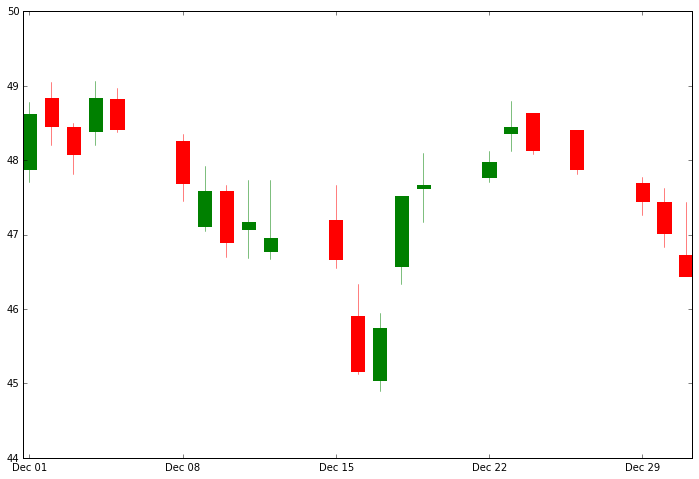

In [17]:
# now draw the plot
plt.figure(figsize(12,8))
fig, ax = plt.subplots()
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');
plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)

# Fundamental Financial Calculations

## Calculating daily percentage change

In [18]:
# calc % change from day 0 to day 1
AA_p_t0 = daily_close_px.iloc[0]['AA']  #Pt-1
AA_p_t1 = daily_close_px.iloc[1]['AA']  #Pt
r_t1 = AA_p_t1 / AA_p_t0 - 1 # returns
AA_p_t0, AA_p_t1, r_t1 

(8.8928600000000007, 9.1048200000000001, 0.023834851779967137)

In [19]:
# we can apply this to everything with the following using slices
dpc_1 = daily_close_px.iloc[1:] / \
        daily_close_px.iloc[:-1].values - 1
dpc_1.ix[:,'AA':'AAPL']

Ticker        AA      AAPL
Date                      
2012-01-04  0.02  5.37e-03
2012-01-05 -0.01  1.11e-02
2012-01-06 -0.02  1.05e-02
2012-01-09  0.03 -1.59e-03
2012-01-10  0.00  3.58e-03
...          ...       ...
2014-12-24  0.00 -4.71e-03
2014-12-26  0.00  1.77e-02
2014-12-29  0.00 -7.02e-04
2014-12-30  0.00 -1.22e-02
2014-12-31 -0.00 -1.90e-02

[753 rows x 2 columns]

In [20]:
# show the DataFrame that is the numerator
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker        AA   AAPL   DAL  ...     MSFT    PEP    UAL
Date                           ...                       
2012-01-04  9.10  55.71  7.89  ...    25.00  60.75  18.52
2012-01-05  9.02  56.33  8.20  ...    25.25  60.28  18.39
2012-01-06  8.83  56.92  8.19  ...    25.64  59.52  18.21
2012-01-09  9.09  56.83  8.15  ...    25.31  59.83  17.93
2012-01-10  9.10  57.03  8.14  ...    25.40  59.77  17.48

[5 rows x 9 columns]

In [21]:
# the numerator is a 2-d array, but excludes the last day
daily_close_px.iloc[:-1].values

array([[   8.89286,   55.41362,    7.9181 , ...,   24.42183,   60.4442 ,
          18.9    ],
       [   9.10482,   55.71143,    7.88855, ...,   24.99657,   60.7537 ,
          18.52   ],
       [   9.01811,   56.32993,    8.2037 , ...,   25.25201,   60.28035,
          18.39   ],
       ..., 
       [  15.79143,  113.54189,   48.2927 , ...,   47.54167,   96.40398,
          65.28   ],
       [  15.79143,  113.46221,   48.68192, ...,   47.1147 ,   96.08612,
          65.22   ],
       [  15.82137,  112.07767,   49.13101, ...,   46.68774,   95.32124,
          66.05   ]])

In [22]:
# or using the shift function
dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2.ix[:,0:2][:5]

Ticker        AA  AAPL
Date                  
2012-01-03   NaN   NaN
2012-01-04  0.02  0.01
2012-01-05 -0.01  0.01
2012-01-06 -0.02  0.01
2012-01-09  0.03 -0.00

In [23]:
# to make this easy, pandas has .pct_change() baked in
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

Ticker        AA  AAPL
Date                  
2012-01-03   NaN   NaN
2012-01-04  0.02  0.01
2012-01-05 -0.01  0.01
2012-01-06 -0.02  0.01
2012-01-09  0.03 -0.00

In [24]:
# set NaN's to 0 
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

Ticker        AA  AAPL   DAL        GE   IBM
Date                                        
2012-01-03  0.00  0.00  0.00  0.00e+00  0.00
2012-01-04  0.02  0.01 -0.00  1.09e-02 -0.00
2012-01-05 -0.01  0.01  0.04 -5.39e-04 -0.00
2012-01-06 -0.02  0.01 -0.00  5.39e-03 -0.01
2012-01-09  0.03 -0.00 -0.00  1.13e-02 -0.01

## Calculating simple daily cumulative returns

In [25]:
# calc the cumulative daily returns 
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker        AA  AAPL
Date                  
2012-01-03  1.00  1.00
2012-01-04  1.02  1.01
2012-01-05  1.01  1.02
2012-01-06  0.99  1.03
2012-01-09  1.02  1.03

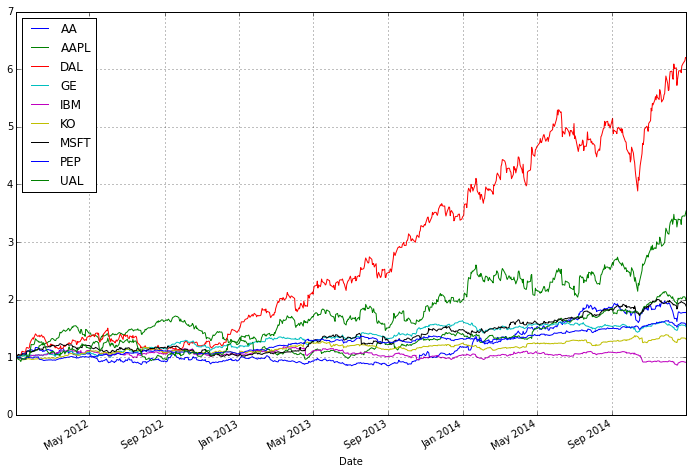

In [26]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
_ = plt.legend(loc=2);
plt.savefig('5104OS_05_08.png', bbox_inches='tight', dpi=300)

## Analyzing distribution of returns

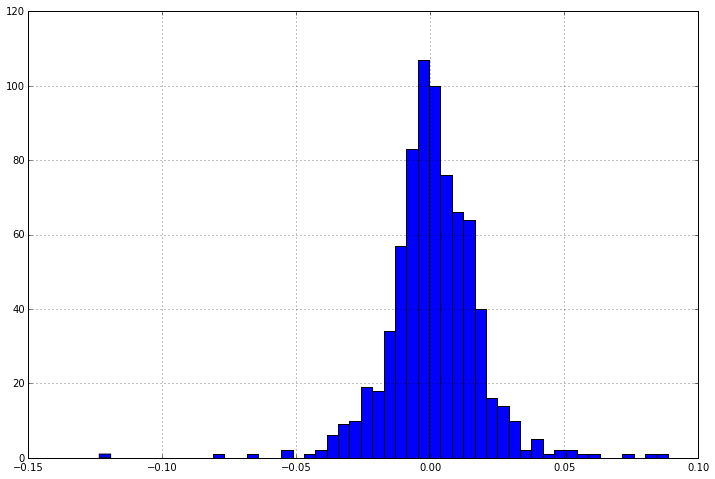

In [27]:
# plot daily % change values histogram for AAPL using 50 bins
aapl = daily_pct_change['AAPL']
_ = aapl.hist(bins=50, figsize=(12,8));
plt.savefig('5104OS_05_09.png', bbox_inches='tight', dpi=300)

In [28]:
# get descriptive statistics
aapl.describe()

count    7.54e+02
mean     1.05e-03
std      1.68e-02
min     -1.24e-01
25%     -7.37e-03
50%      4.99e-04
75%      1.10e-02
max      8.87e-02
Name: AAPL, dtype: float64

In [29]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    7.54e+02
mean     1.05e-03
std      1.68e-02
min     -1.24e-01
2.5%    -3.19e-02
50%      4.99e-04
97.5%    3.17e-02
max      8.87e-02
Name: AAPL, dtype: float64

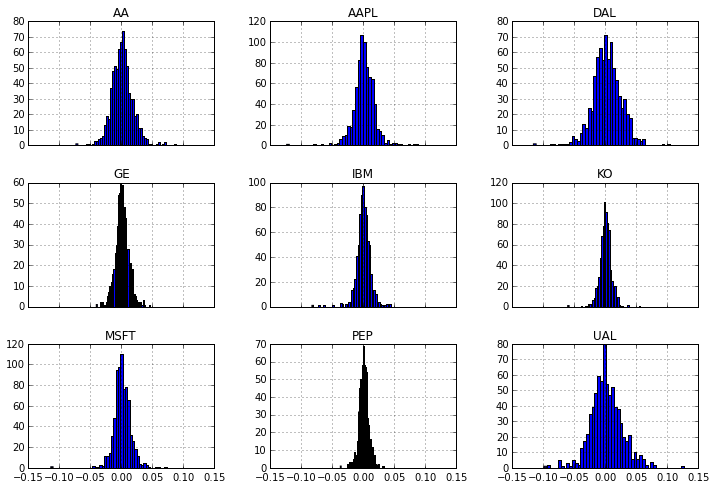

In [30]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('5104OS_05_10.png', bbox_inches='tight', dpi=300)

### QQ-Plots

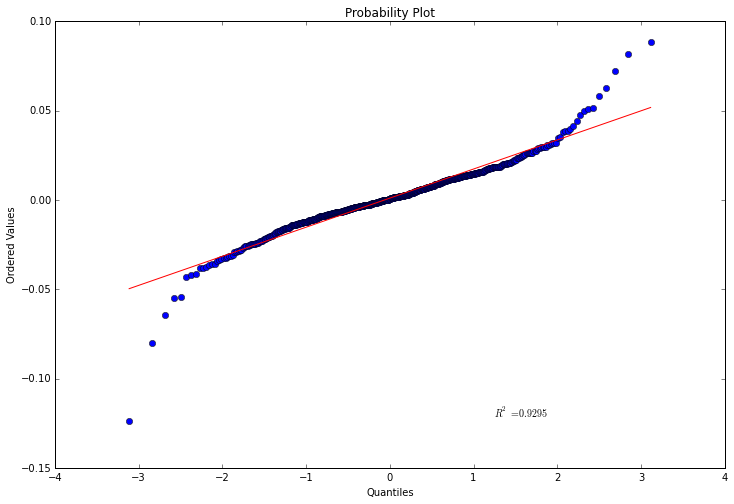

In [31]:
# create a qq-plot of AAPl returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();
plt.savefig('5104OS_05_11.png', dpi=300)

### Box and whisker plots

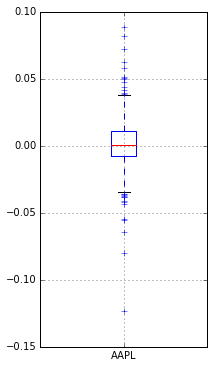

In [32]:
# create a box and whisker for the AAPL returns
_ = daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));
plt.savefig('5104OS_05_12.png', dpi=300)

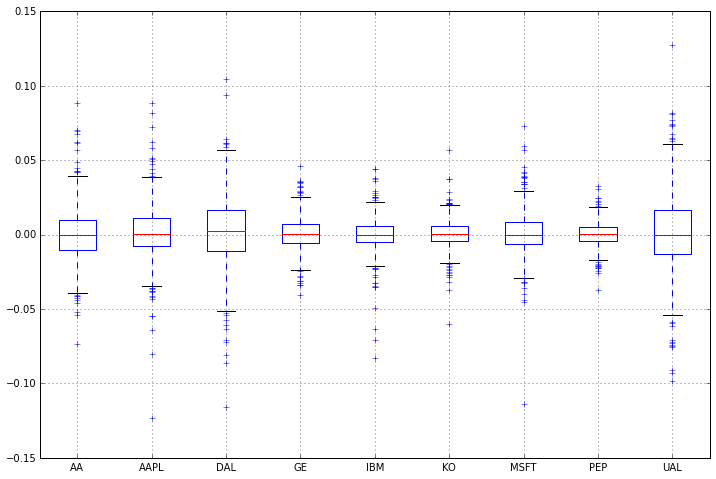

In [33]:
# examine all the returns 
daily_pct_change.plot(kind='box', figsize=(12,8));
plt.savefig('5104OS_05_13.png', dpi=300)

## Comparison of daily percentage change between stocks

In [34]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

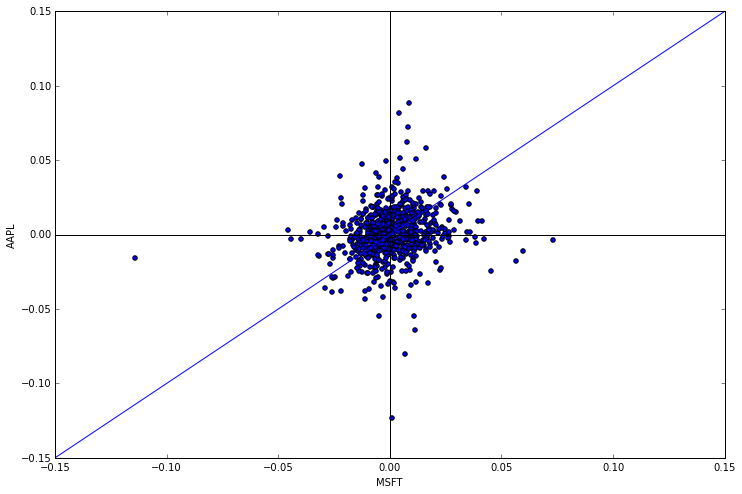

In [35]:
# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)
plt.savefig('5104OS_05_14.png', bbox_inches='tight', dpi=300)

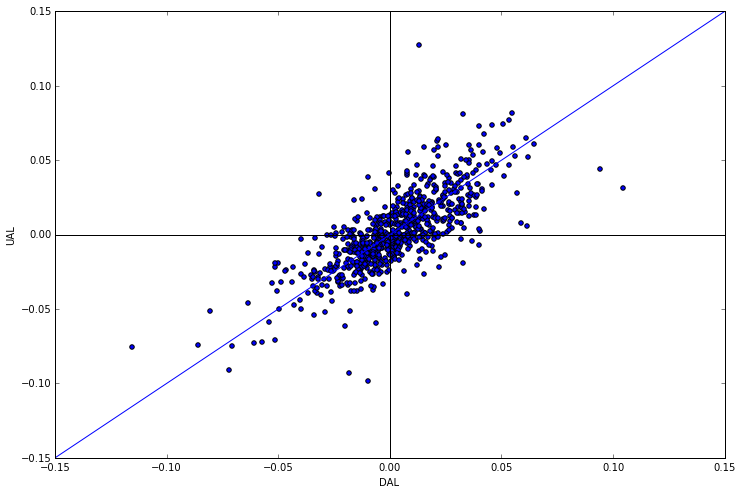

In [36]:
# DAL vs UAL
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)
plt.savefig('5104OS_05_15.png', bbox_inches='tight', dpi=300)

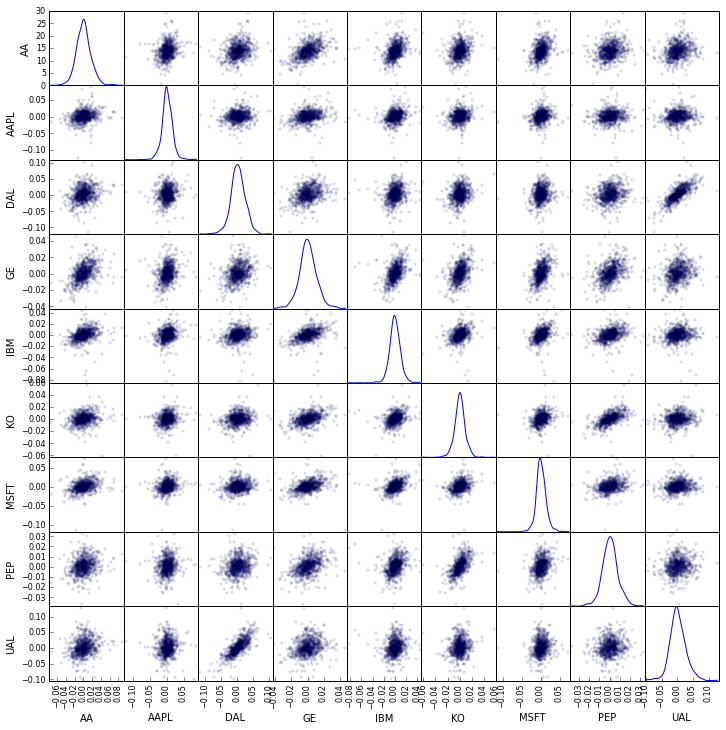

In [37]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                      figsize=(12,12));
plt.savefig('5104OS_05_16.png', bbox_inches='tight', dpi=300)

## Moving Windows

In [38]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    24.42
2012-01-04    25.00
2012-01-05    25.25
2012-01-06    25.64
2012-01-09    25.31
Name: Adj Close, dtype: float64

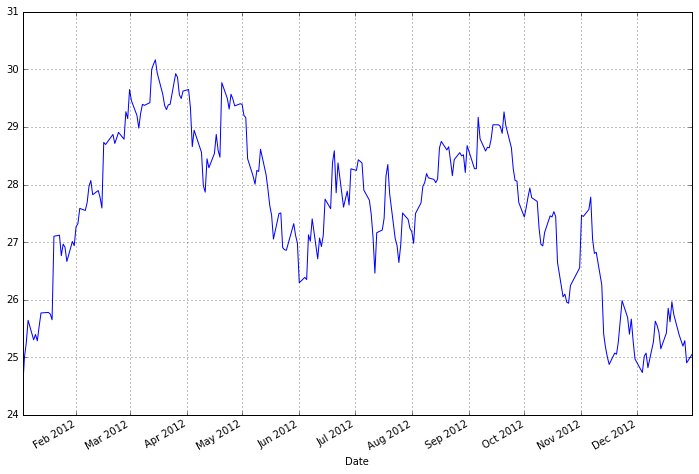

In [39]:
sample = msftAC['2012'] 
sample.plot(figsize=(12,8));
plt.savefig('5104OS_05_17.png', bbox_inches='tight', dpi=300)

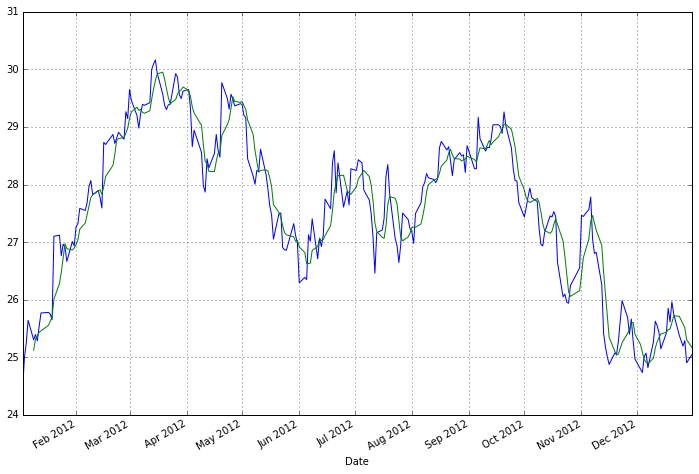

In [40]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));
plt.savefig('5104OS_05_18.png', bbox_inches='tight', dpi=300)

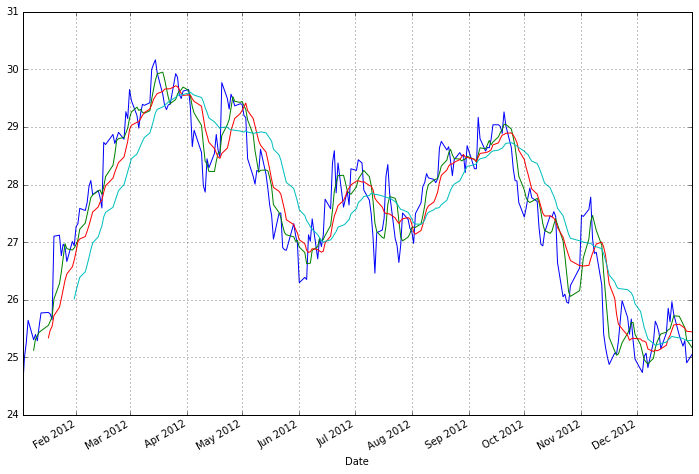

In [41]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));
plt.savefig('5104OS_05_19.png', bbox_inches='tight', dpi=300)

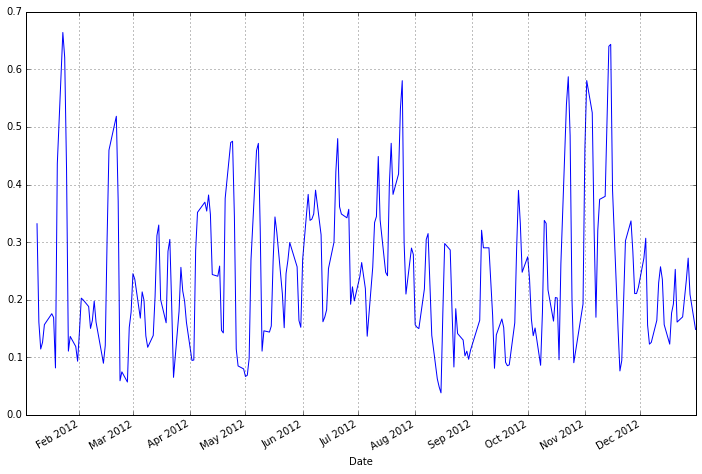

In [42]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));
plt.savefig('5104OS_05_20.png', bbox_inches='tight', dpi=300)

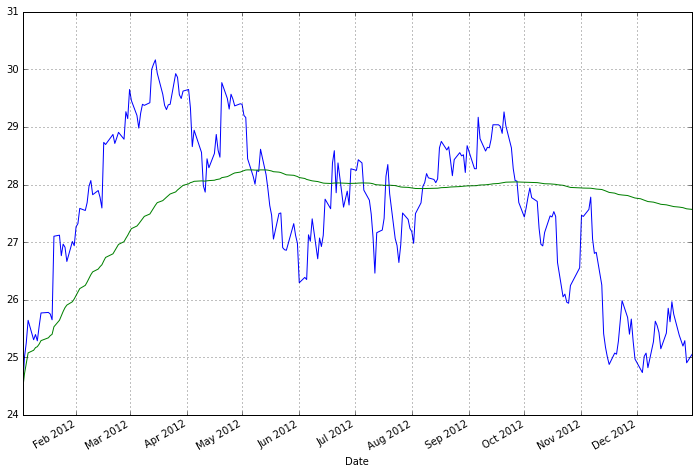

In [43]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), 
                                           min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot(figsize=(12,8));
plt.savefig('5104OS_05_21.png', bbox_inches='tight', dpi=300)

## Volatility calculation

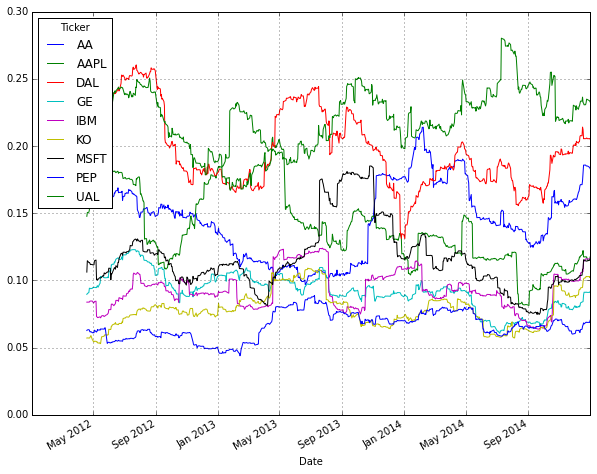

In [44]:
# use a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(daily_pct_change, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));
plt.savefig('5104OS_05_22.png', bbox_inches='tight', dpi=300)

## Rolling correlation of returns

In [45]:
# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], 
                               daily_pct_change['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

Date
2014-01-02    0.08
2014-01-03    0.08
2014-01-06    0.07
2014-01-07    0.07
2014-01-08    0.07
              ... 
2014-12-24    0.23
2014-12-26    0.23
2014-12-29    0.23
2014-12-30    0.23
2014-12-31    0.24
dtype: float64

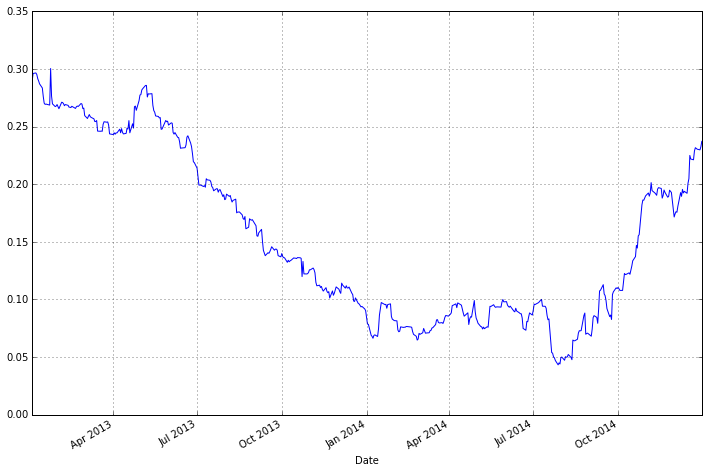

In [46]:
# plot the rolling correlation
_ = rolling_corr.plot(figsize=(12,8));
plt.savefig('5104OS_05_23.png', bbox_inches='tight', dpi=300)

## Least squares regression of returns (beta)

In [47]:
# least squares on the returns of AAPL and MSFT
model = pd.ols(y=daily_pct_change['AAPL'], 
               x={'MSFT': daily_pct_change['MSFT']}, 
               window=250)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [48]:
# what is the beta?
model.beta[0:5]

            MSFT  intercept
Date                       
2012-12-31  0.40          0
2013-01-02  0.41          0
2013-01-03  0.41          0
2013-01-04  0.42          0
2013-01-07  0.42          0

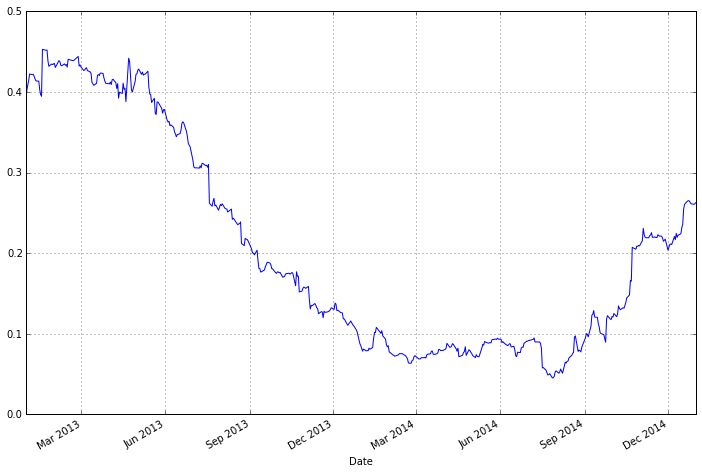

In [49]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)

# Comparing stocks to the S&P 500

In [50]:
# we need to calculate the pct change on the close for S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.00e+00
2012-01-04    1.88e-04
2012-01-05    2.94e-03
2012-01-06   -2.54e-03
2012-01-09    2.26e-03
Name: Adj Close, dtype: float64

In [51]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

               SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                              ...                   
2012-01-03  0.00e+00  0.00  0.00  ...   0.00  0.00  0.00
2012-01-04  1.88e-04  0.02  0.01  ...   0.02  0.01 -0.02
2012-01-05  2.94e-03 -0.01  0.01  ...   0.01 -0.01 -0.01
2012-01-06 -2.54e-03 -0.02  0.01  ...   0.02 -0.01 -0.01
2012-01-09  2.26e-03  0.03 -0.00  ...  -0.01  0.01 -0.02

[5 rows x 10 columns]

In [52]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                           ...                   
2012-01-03      1  1.00  1.00  ...   1.00  1.00  1.00
2012-01-04      1  1.02  1.01  ...   1.02  1.01  0.98
2012-01-05      1  1.01  1.02  ...   1.03  1.00  0.97
2012-01-06      1  0.99  1.03  ...   1.05  0.98  0.96
2012-01-09      1  1.02  1.03  ...   1.04  0.99  0.95

[5 rows x 10 columns]

In [53]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500    AA  AAPL  ...   MSFT   PEP   UAL
SP500   1.00  0.60  0.41  ...   0.54  0.52  0.32
AA      0.60  1.00  0.24  ...   0.31  0.23  0.22
AAPL    0.41  0.24  1.00  ...   0.19  0.09  0.06
DAL     0.42  0.25  0.14  ...   0.15  0.17  0.76
GE      0.73  0.46  0.24  ...   0.34  0.38  0.24
IBM     0.53  0.31  0.21  ...   0.36  0.26  0.12
KO      0.53  0.23  0.16  ...   0.27  0.56  0.14
MSFT    0.54  0.31  0.19  ...   1.00  0.28  0.13
PEP     0.52  0.23  0.09  ...   0.28  1.00  0.13
UAL     0.32  0.22  0.06  ...   0.13  0.13  1.00

[10 rows x 10 columns]

In [54]:
# how well did each stock relate to the S&P 500?
dpc_corrs.ix['SP500']

SP500    1.00
AA       0.60
AAPL     0.41
DAL      0.42
GE       0.73
IBM      0.53
KO       0.53
MSFT     0.54
PEP      0.52
UAL      0.32
Name: SP500, dtype: float64

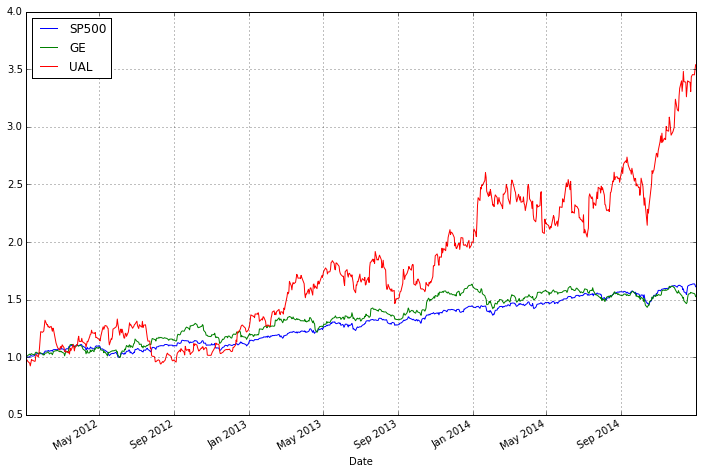

In [55]:
# plot GE/UAL against S&P500
_ = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));
plt.savefig('5104OS_05_25.png', bbox_inches='tight', dpi=300)

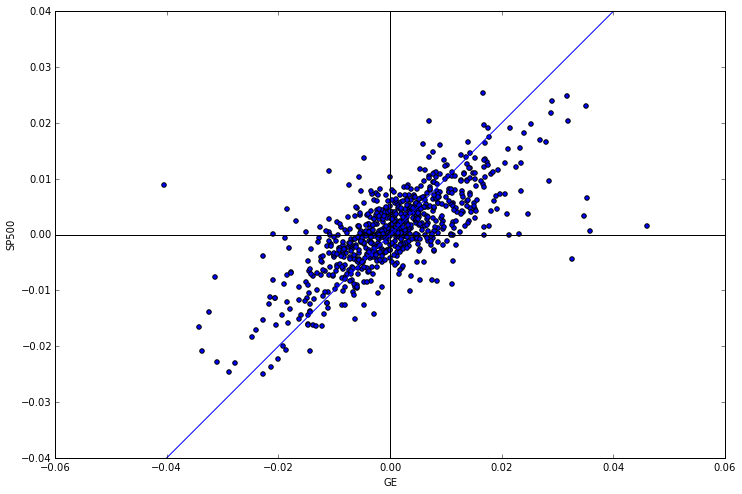

In [56]:
# GE vs S&P 500
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('5104OS_05_26.png', bbox_inches='tight', dpi=300)

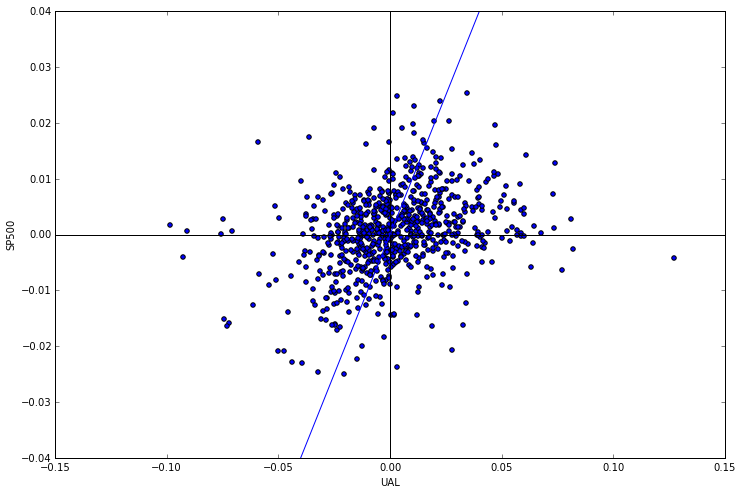

In [57]:
# and UAL vs S&P 500
render_scatter_plot(dpc_all, 'UAL', 'SP500')
plt.savefig('5104OS_05_27.png', bbox_inches='tight', dpi=300)